In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
car=pd.read_csv('DS2_C5_S2_Mtcars_Data_Practice.csv')
car

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
carcorr=car.corr()
carcorr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


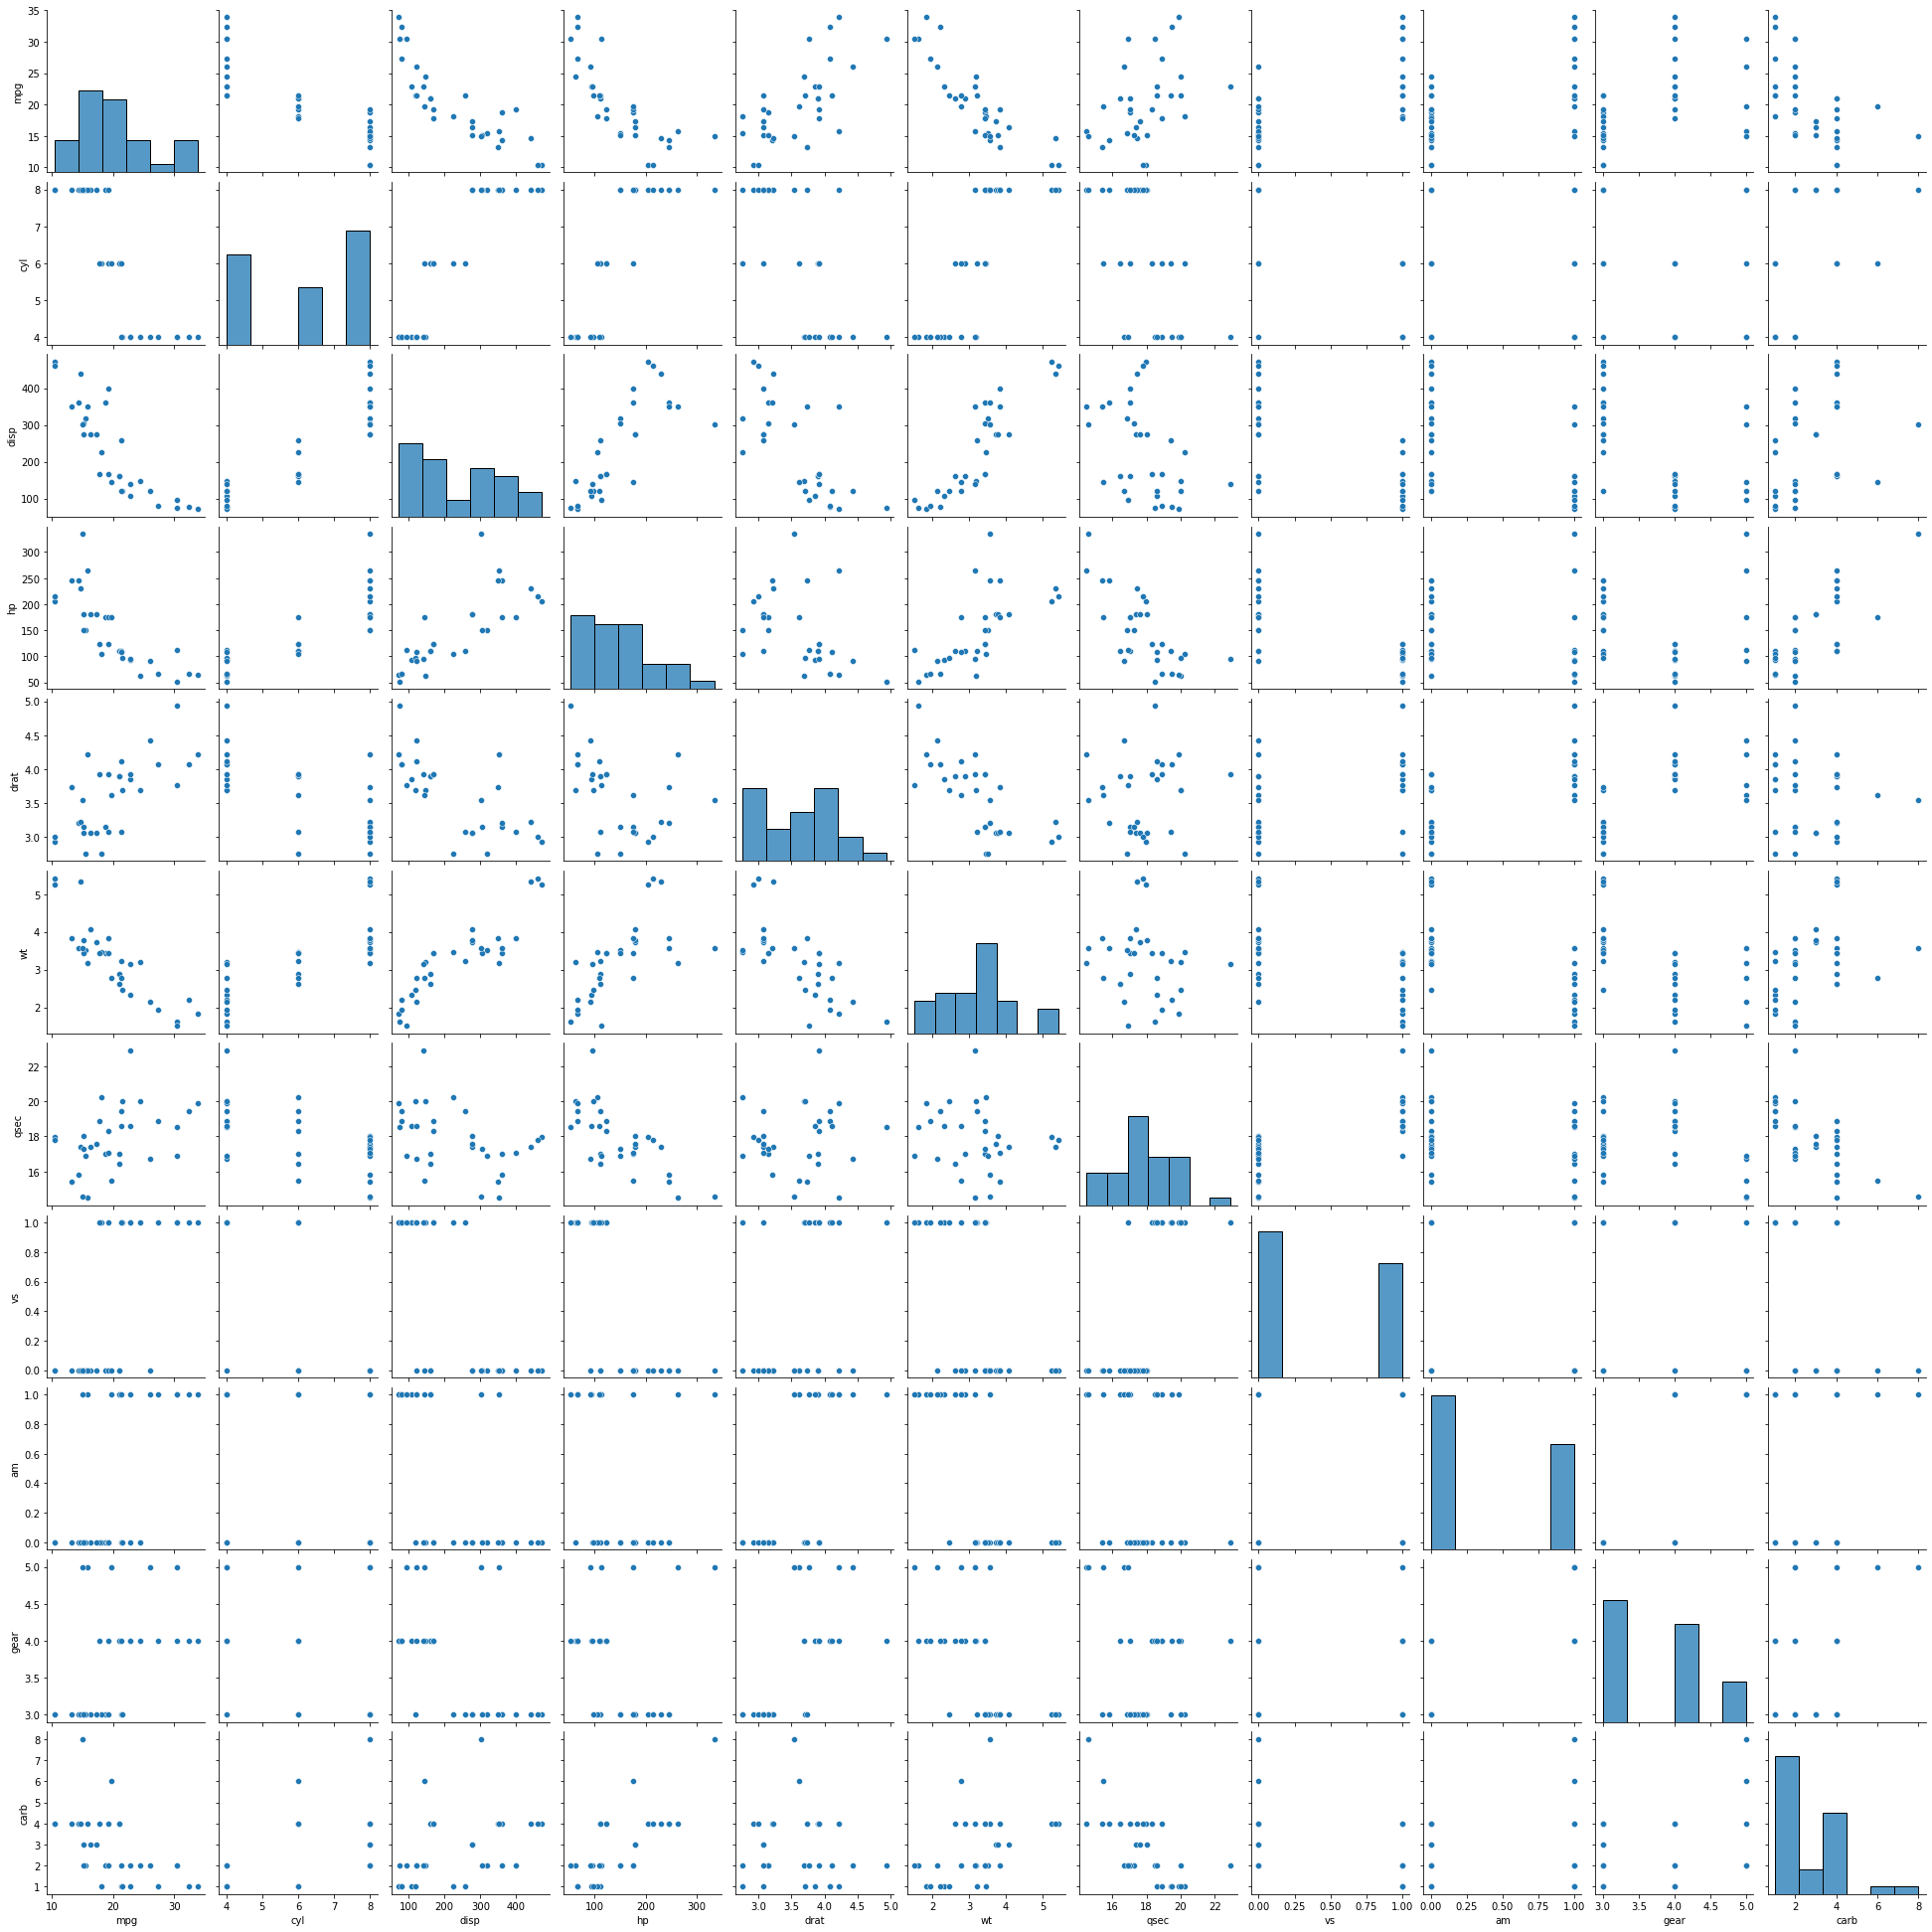

In [4]:
sns.pairplot(car)

In [5]:
X1=np.array(car['hp']).reshape((-1, 1))
y1=np.array(car['mpg'])

In [6]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size= 0.3, random_state = 88)

In [7]:
model1=LinearRegression()

In [8]:
model1.fit(X_train1,y_train1)

LinearRegression()

In [9]:
test_prediction1=model1.predict(X_test1)

In [10]:
test_prediction1

array([17.10220946, 23.43292079, 23.73083662, 25.66728949, 10.84597709,
        5.55797115, 26.63551593, 19.33657816, 22.31573644, 15.24023554])

In [11]:
MAE1 = mean_absolute_error (y_test1, test_prediction1)
MSE1 = mean_squared_error (y_test1, test_prediction1)
RMSE1 = np.sqrt(MSE1)

In [12]:
print('MAE1 =',MAE1)
print('MSE1 =',MSE1)
print('RMSE1 =',RMSE1)

MAE1 = 4.109009010731771
MSE1 = 24.618893859209656
RMSE1 = 4.961743026317431


In [13]:
final_model1= LinearRegression()

In [14]:
final_model1.fit(X1,y1)

LinearRegression()

In [60]:
co1=final_model1.coef_
co1

array([-0.06822828])

In [61]:
i1=final_model1.intercept_
i1

30.098860539622496

In [64]:
print('y =',str(co1[0])+'x +',i1,'+ error')

y = -0.06822827807156365x + 30.098860539622496 +error


In [17]:
y1_hat=final_model1.predict(X1)

In [18]:
r2_score(y1, y1_hat)

0.602437341423934

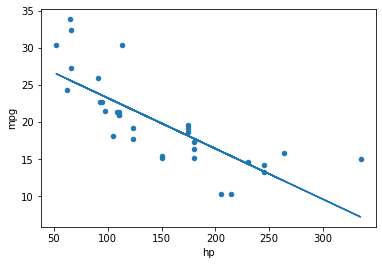

In [19]:
car.plot.scatter(x='hp',y='mpg')
plt.plot(X1,y1_hat)

In [20]:
X2=car[['hp','wt']]
y2=car['mpg']

In [21]:
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size= 0.3, random_state = 88)

In [22]:
model2=LinearRegression()

In [23]:
model2.fit(X_train2,y_train2)

LinearRegression()

In [24]:
test_prediction2=model2.predict(X_test2)

In [25]:
test_prediction2

array([16.90552774, 21.94131921, 25.24521112, 27.13686918, 15.78498142,
       11.973526  , 28.29386365, 19.06655213, 21.19710753, 11.40536841])

In [26]:
MAE2 = mean_absolute_error (y_test2, test_prediction2)
MSE2 = mean_squared_error (y_test2, test_prediction2)
RMSE2 = np.sqrt(MSE2)

In [27]:
print('MAE2 =',MAE2)
print('MSE2 =',MSE2)
print('RMSE2 =',RMSE2)

MAE2 = 2.030457017053089
MSE2 = 7.955353940649511
RMSE2 = 2.820523699714206


In [28]:
final_model2= LinearRegression()

In [29]:
final_model2.fit(X2,y2)

LinearRegression()

In [67]:
co2=final_model2.coef_
co2

array([-0.03177295, -3.87783074])

In [68]:
i2=final_model2.intercept_
i2

37.2272701164472

In [77]:
print('y =',str(co2[0])+'(x1) +',str(co2[1])+'(x2) +',i2,'+ error')

y = -0.03177294698216097(x1) + -3.87783074240468(x2) + 37.2272701164472 + error


In [32]:
y2_hat=final_model2.predict(X2)

In [33]:
r2_score(y2, y2_hat)

0.8267854518827914

C:\Users\saiki\AppData\Local\Temp\ipykernel_1516\3478805765.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)


Text(0.5, 0, 'mpg')

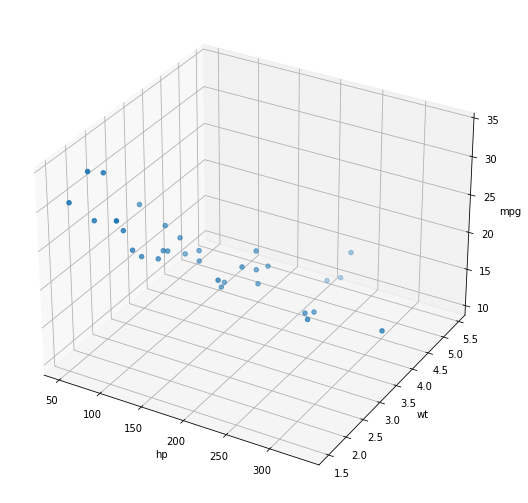

In [66]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
x=X2['hp']
y=X2['wt']
ax.scatter3D(x,y,y2)
ax.set_xlabel('hp')
ax.set_ylabel('wt')
ax.set_zlabel('mpg')

In [35]:
X2col=list(X2.columns)

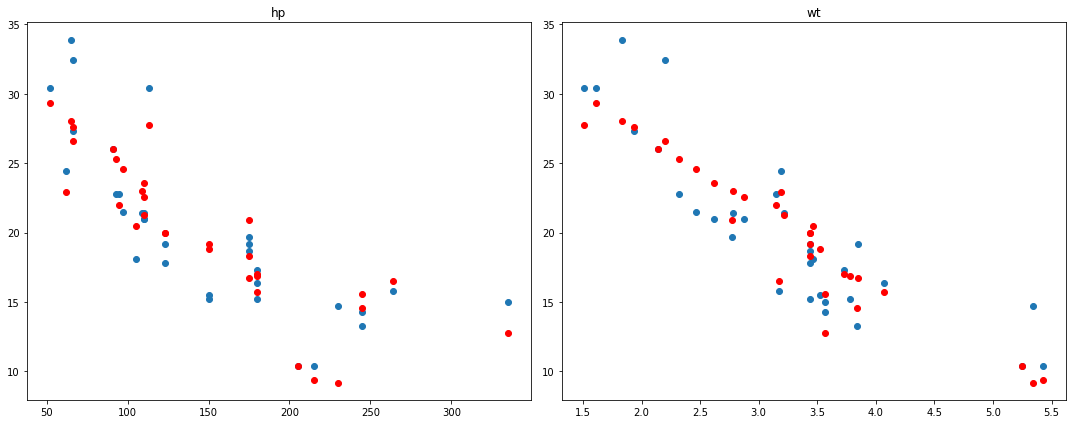

In [36]:
fig,ax = plt.subplots(1,len(X2col),figsize=(15,6))
for i in range(len(X2col)):
    ax[i].plot(X2[X2col[i]],y2,'o')
    ax[i].plot(X2[X2col[i]],y2_hat,'o',color='red')
    ax[i].set_title(X2col[i])
plt.tight_layout()

In [37]:
X3=car[['hp','wt','qsec']]
y3=car['mpg']

In [38]:
X_train3, X_test3, y_train3, y_test3= train_test_split(X3, y3, test_size= 0.3, random_state = 88)

In [39]:
model3=LinearRegression()

In [40]:
model3.fit(X_train3,y_train3)

LinearRegression()

In [41]:
test_prediction3=model3.predict(X_test3)

In [42]:
test_prediction3

array([17.05734577, 22.65846886, 24.95946073, 27.36947665, 15.87565472,
       12.4137764 , 28.23250204, 18.9802484 , 21.33027425, 11.40840392])

In [43]:
MAE3 = mean_absolute_error (y_test3, test_prediction3)
MSE3 = mean_squared_error (y_test3, test_prediction3)
RMSE3 = np.sqrt(MSE3)

In [44]:
print('MAE3 =',MAE3)
print('MSE3 =',MSE3)
print('RMSE3 =',RMSE3)

MAE3 = 1.9257693872339239
MSE3 = 7.3904563200321745
RMSE3 = 2.718539372536689


In [45]:
final_model3=LinearRegression()

In [46]:
final_model3.fit(X3,y3)

LinearRegression()

In [74]:
co3=final_model3.coef_
co3

array([-0.01782227, -4.3587972 ,  0.51083369])

In [75]:
i3=final_model3.intercept_
i3

27.61052685820499

In [76]:
print('y =',str(co3[0])+'(x1) +',str(co3[1])+'(x2) +',str(co3[2])+'(x3) +',i3,'+ error')

y = -0.01782227160554257(x1) + -4.35879720016268(x2) + 0.5108336942450546(x3) + 27.61052685820499 + error


In [50]:
y3_hat=final_model3.predict(X3)

In [54]:
r2_score(y3, y3_hat)

0.8347677617058298

In [56]:
X3col=list(X3.columns)

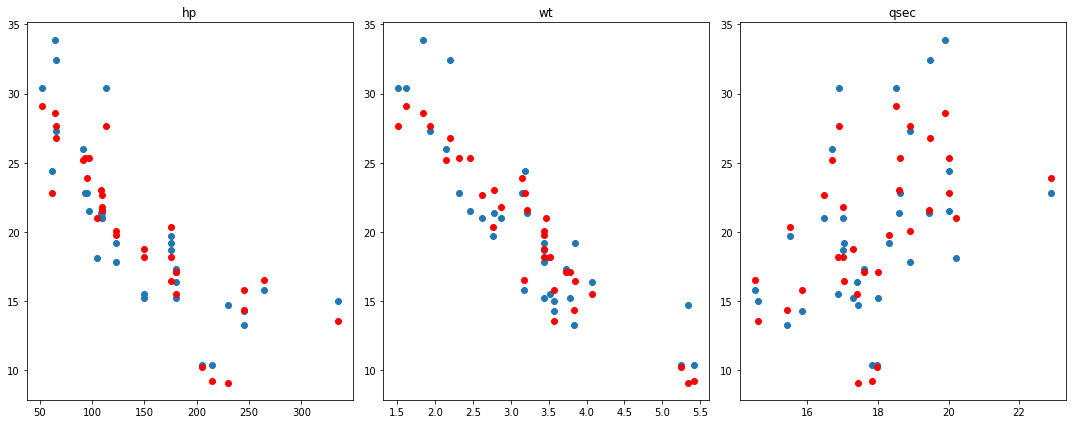

In [58]:
fig,ax = plt.subplots(1,len(X3col),figsize=(15,6))
for i in range(len(X3col)):
    ax[i].plot(X3[X3col[i]],y3,'o')
    ax[i].plot(X3[X3col[i]],y3_hat,'o',color='red')
    ax[i].set_title(X3col[i])
plt.tight_layout()